In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('HR_data.csv')

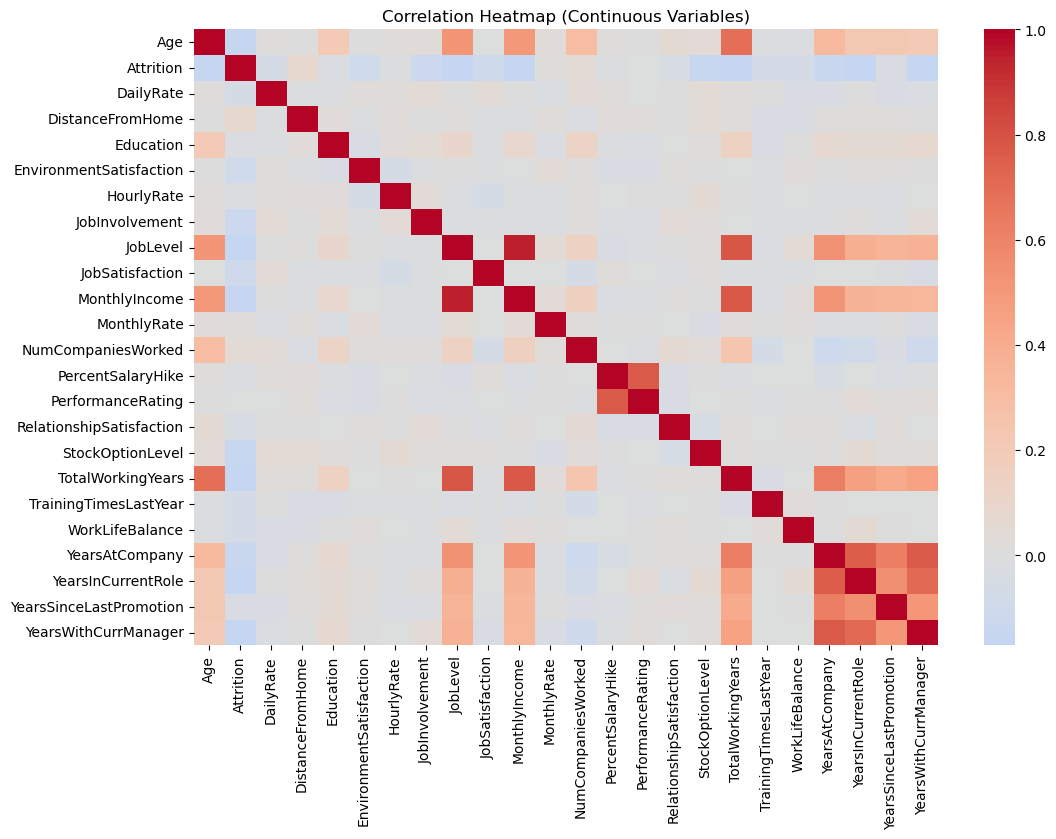

In [3]:
# 將 Attrition 轉成數值
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 選出數值變數
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 計算相關係數
corr = df[num_cols].corr()

# 畫出熱圖
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Continuous Variables)")
plt.show()

In [4]:
corr_target = corr['Attrition'].sort_values(ascending=False)
print(corr_target)

Attrition                   1.000000
DistanceFromHome            0.078189
NumCompaniesWorked          0.042607
MonthlyRate                 0.011572
PerformanceRating          -0.004001
HourlyRate                 -0.008826
PercentSalaryHike          -0.017466
Education                  -0.025496
YearsSinceLastPromotion    -0.036834
RelationshipSatisfaction   -0.039404
DailyRate                  -0.055527
TrainingTimesLastYear      -0.063648
WorkLifeBalance            -0.065047
EnvironmentSatisfaction    -0.098358
JobSatisfaction            -0.102059
JobInvolvement             -0.126244
YearsAtCompany             -0.139072
StockOptionLevel           -0.144639
Age                        -0.153621
MonthlyIncome              -0.162391
YearsWithCurrManager       -0.163367
YearsInCurrentRole         -0.163395
JobLevel                   -0.171050
TotalWorkingYears          -0.171609
Name: Attrition, dtype: float64


In [6]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Attrition')

for col in num_cols:
    group_yes = df[df['Attrition'] == 1][col]
    group_no = df[df['Attrition'] == 0][col]
    stat, p = f_oneway(group_yes, group_no)
    if p < 0.05:
        print(f"{col}: Significant (p={p:.4f}) ✅")
    else:
        print(f"{col}: Not Significant (p={p:.4f}) ❌")

Age: Significant (p=0.0000) ✅
DailyRate: Significant (p=0.0362) ✅
DistanceFromHome: Significant (p=0.0032) ✅
Education: Not Significant (p=0.3365) ❌
EnvironmentSatisfaction: Significant (p=0.0002) ✅
HourlyRate: Not Significant (p=0.7394) ❌
JobInvolvement: Significant (p=0.0000) ✅
JobLevel: Significant (p=0.0000) ✅
JobSatisfaction: Significant (p=0.0001) ✅
MonthlyIncome: Significant (p=0.0000) ✅
MonthlyRate: Not Significant (p=0.6627) ❌
NumCompaniesWorked: Not Significant (p=0.1082) ❌
PercentSalaryHike: Not Significant (p=0.5103) ❌
PerformanceRating: Not Significant (p=0.8801) ❌
RelationshipSatisfaction: Not Significant (p=0.1374) ❌
StockOptionLevel: Significant (p=0.0000) ✅
TotalWorkingYears: Significant (p=0.0000) ✅
TrainingTimesLastYear: Significant (p=0.0163) ✅
WorkLifeBalance: Significant (p=0.0141) ✅
YearsAtCompany: Significant (p=0.0000) ✅
YearsInCurrentRole: Significant (p=0.0000) ✅
YearsSinceLastPromotion: Not Significant (p=0.1649) ❌
YearsWithCurrManager: Significant (p=0.0000

In [8]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency
import numpy as np

df = df.copy()  # 修改為你的 dataframe 名
target = "Attrition"

results = []

for col in df.columns:
    if col == target:
        continue
    
    # 判斷類別/連續變數
    if df[col].dtype == "object" or df[col].nunique() <= 10:
        var_type = "Categorical"
    else:
        var_type = "Continuous"
    
    # 計算與 Attrition 的關聯
    try:
        if var_type == "Continuous":
            groups = [df[df[target]==cls][col] for cls in df[target].unique()]
            p_value = f_oneway(*groups).pvalue
        else:
            contingency = pd.crosstab(df[col], df[target])
            p_value = chi2_contingency(contingency)[1]
    except:
        p_value = np.nan
    
    # 建議邏輯
    if p_value < 0.05:
        if var_type == "Continuous" and df[col].nunique() > 20:
            suggestion = "➡️ 建議分箱（Binning）"
        else:
            suggestion = "✅ 重要特徵"
    else:
        if var_type == "Continuous":
            suggestion = "🔄 可轉分類或降維"
        else:
            suggestion = "❌ 低影響，可考慮移除"
    
    results.append([col, var_type, df[col].nunique(), round(p_value,5), suggestion])

recommend_df = pd.DataFrame(results, columns=["Feature", "Type", "Unique Values", "p-value", "Recommendation"])
recommend_df.sort_values("Recommendation")
recommend_df


,Feature,Type,Unique Values,p-value,Recommendation
0,Age,Continuous,43,0.00000,➡️ 建議分箱（Binning）
1,AgeGroup,Categorical,5,0.00000,✅ 重要特徵
2,BusinessTravel,Categorical,4,0.00002,✅ 重要特徵
3,DailyRate,Continuous,867,0.03622,➡️ 建議分箱（Binning）
4,Department,Categorical,3,0.00325,✅ 重要特徵
5,DistanceFromHome,Continuous,29,0.00316,➡️ 建議分箱（Binning）
6,Education,Categorical,5,0.74516,❌ 低影響，可考慮移除
7,EducationField,Categorical,6,0.00211,✅ 重要特徵
8,EnvironmentSatisfaction,Categorical,4,0.00007,✅ 重要特徵
9,Gender,Categorical,2,0.27229,❌ 低影響，可考慮移除
